c:\Users\devpa\anaconda3\envs\xgboost-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.60      0.09      0.16       195
           1       0.08      0.56      0.14        27

    accuracy                           0.15       222
   macro avg       0.34      0.32      0.15       222
weighted avg       0.54      0.15      0.16       222



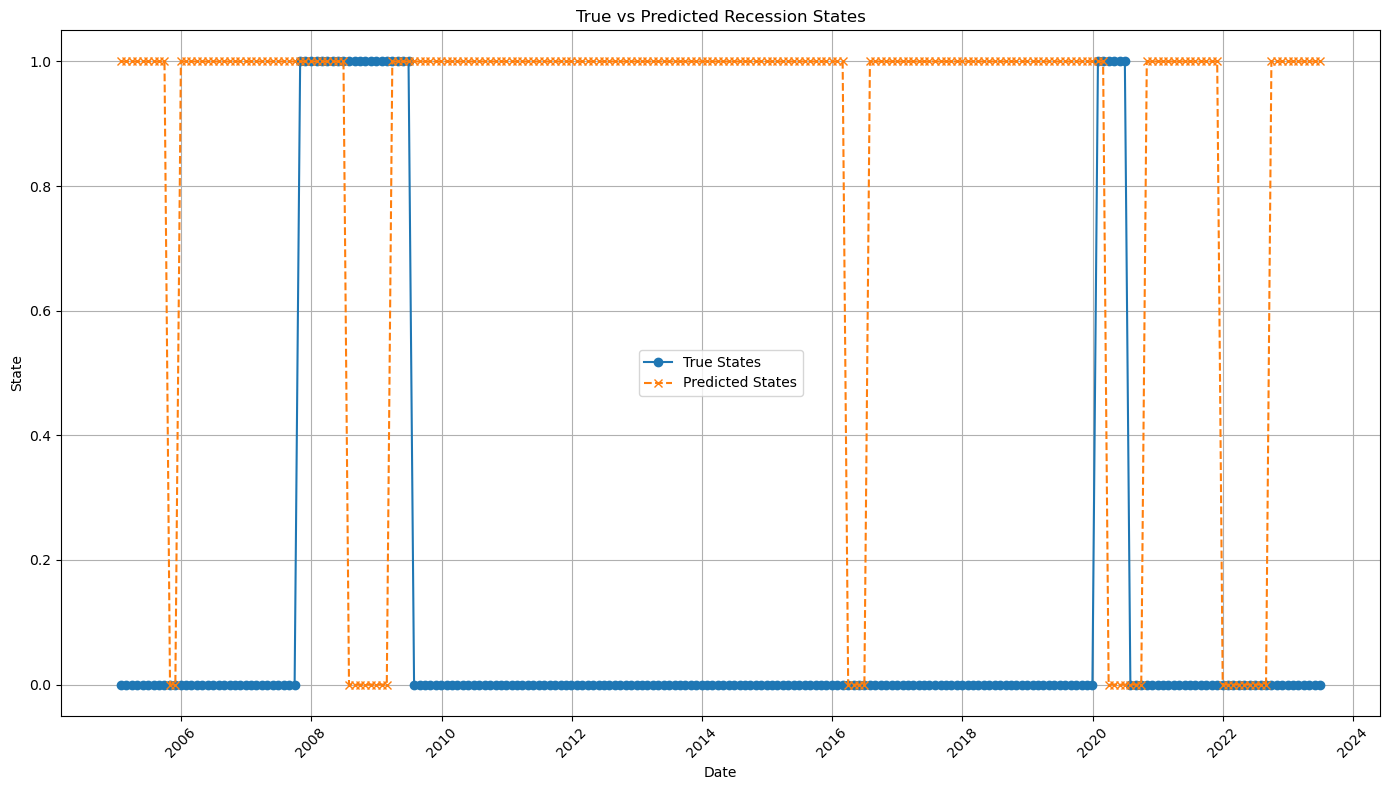

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
file_path = 'merged_data1.csv'  # Update to your local file path
data = pd.read_csv(file_path)

# Ensure the DATE column is in datetime format
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.sort_values('DATE')

# Step 2: Select features and target
features = ['gdp_percent_change', 'inflation_percent_change', 'unemployment_percent_change',
            'Slope', 'LongTermRate', 'ZeroCouponYield1Y']  # Add more if needed
X = data[features]
y = data['Recession']  # Target variable
dates = data['DATE']  # Keep dates for plotting

# Step 3: Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 4: Create sequences of observations
sequence_length = 3
sequences = []
sequence_labels = []
sequence_dates = []

for i in range(len(X_normalized) - sequence_length + 1):
    # Create a sequence of length `sequence_length`
    sequences.append(X_normalized[i:i + sequence_length])
    # Label for the sequence (based on the last element in the sequence)
    sequence_labels.append(y.iloc[i + sequence_length - 1])
    # Date for the sequence (based on the last date in the sequence)
    sequence_dates.append(dates.iloc[i + sequence_length - 1])

sequences = np.array(sequences)
sequence_labels = np.array(sequence_labels)
sequence_dates = np.array(sequence_dates)

# Step 5: Split data into training (up to 2004) and testing sets
train_mask = sequence_dates <= pd.Timestamp("2004-12-31")
X_train = sequences[train_mask]
y_train = sequence_labels[train_mask]
X_test = sequences[~train_mask]
y_test = sequence_labels[~train_mask]
test_dates = sequence_dates[~train_mask]

# Step 6: Train the HMM
n_states = 2  # Recession (1) and No Recession (0)
hmm_model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)

# Flatten the sequences for HMM compatibility
X_train_flattened = X_train.reshape(-1, X_train.shape[-1])  # Collapse sequences into a single array
hmm_model.fit(X_train_flattened)

# Step 7: Predict and Evaluate
X_test_flattened = X_test.reshape(-1, X_test.shape[-1])
predicted_states = hmm_model.predict(X_test_flattened)

# Reshape predictions to match the sequence length
predicted_labels = np.array([predicted_states[i * sequence_length] for i in range(len(y_test))])

# Generate classification report
classification_report_output = classification_report(y_test, predicted_labels)
print(classification_report_output)

# Step 8: Visualize Results with Dates
plt.figure(figsize=(14, 8))
plt.plot(test_dates, y_test, label="True States", marker="o", linestyle="-")
plt.plot(test_dates, predicted_labels, label="Predicted States", marker="x", linestyle="--")
plt.legend()
plt.title("True vs Predicted Recession States")
plt.xlabel("Date")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler


# Load preprocessed data
data = pd.read_csv('merged_data1.csv')
#data = data.drop(index=0)
X = data.drop(columns=['DATE', 'Recession']).values  # Adjust if the date column has a different name


# Train the HMM
n_states = 2 # Number of regimes
hmm_model = GaussianHMM(n_components=n_states, covariance_type="spherical", random_state=42)
hmm_model.fit(X_normalized)

# Predict the hidden states (regimes)
hidden_states = hmm_model.predict(X)

# Add predicted regimes to the dataset
data['Regime'] = hidden_states

# Save the results
data.to_csv("hmm_regimes.csv", index=False)

# Output the first few rows with the regimes
print("The processed dataset with HMM regimes has been saved as 'processed_data_with_hmm_regimes.csv'.")
print(data.head())


The processed dataset with HMM regimes has been saved as 'processed_data_with_hmm_regimes.csv'.
         DATE  gdp_percent_change  inflation_percent_change  \
0  1961-06-30            0.636050                  0.000000   
1  1961-07-31            0.632030                  0.268097   
2  1961-08-31            0.653890                  0.066845   
3  1961-09-30            0.649642                  0.133601   
4  1961-10-31            0.645449                  0.000000   

   unemployment_percent_change     Slope  LongTermRate  ZeroCouponYield1Y  \
0                    -2.816901 -1.268221      4.002757           2.974685   
1                     1.449275 -1.967420      4.100839           2.841955   
2                    -5.714286 -1.712356      4.248369           3.001652   
3                     1.515152 -1.691689      4.130283           3.043195   
4                    -2.985075 -1.607382      3.815504           2.962929   

   ZeroCouponYield2Y  ZeroCouponYield3Y  ZeroCouponYield4Y  ..

c:\Users\devpa\anaconda3\envs\xgboost-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [31]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('merged_data1.csv')
data['DATE'] = pd.to_datetime(data['DATE'])


# Step 2: Select features and target
features = ['gdp_percent_change', 'inflation_percent_change', 'unemployment_percent_change',
            'Slope', 'LongTermRate', 'ZeroCouponYield1Y']  # Add more if needed
X = data[features]
y = data['Recession']  # Target variable

# Step 3: Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 4: Create sequences of observations
observations = X_normalized.tolist()  # Convert normalized array to list
labels = y.tolist()  # Convert target variable to list

print("Sample Observation:", observations[:3])
print("Sample Label:", labels[:3])


Sample Observation: [[1.0860241427256303, -0.9856114008197678, -0.8160867184602995, -0.08470844641484673, -0.3761687545847541, -0.5582785043148583], [1.0747436196557372, -0.14000263222983245, 0.5186651487371584, -0.24104040078820207, -0.3539113700258767, -0.5983028044872385], [1.1360829779023258, -0.774774454700969, -1.722586688085822, -0.18401132178623786, -0.3204329904257806, -0.5501465009459615]]
Sample Label: [0, 0, 0]


In [32]:
import numpy as np

# Define the sequence length (e.g., 3 for quarterly data)
sequence_length = 3

# Generate sequences for features and labels
sequences = []
sequence_labels = []

for i in range(len(observations) - sequence_length + 1):
    # Create a sequence of length `sequence_length`
    sequences.append(observations[i:i + sequence_length])
    # Label for the sequence (based on the last element in the sequence)
    sequence_labels.append(labels[i + sequence_length - 1])

sequences = np.array(sequences)
sequence_labels = np.array(sequence_labels)

print("Sample Sequences Shape:", sequences.shape)  # (number_of_sequences, sequence_length, features)
print("Sample Sequence Labels Shape:", sequence_labels.shape)  # (number_of_sequences,)


Sample Sequences Shape: (743, 3, 6)
Sample Sequence Labels Shape: (743,)


In [33]:
from sklearn.model_selection import train_test_split

# Split sequences into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences, sequence_labels, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (594, 3, 6)
Testing Data Shape: (149, 3, 6)


In [34]:
from hmmlearn.hmm import GaussianHMM

# Initialize the HMM model
n_states = 2  # Recession (1) and No Recession (0)
hmm_model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)

# Train the model using training data
# Flatten the sequences for HMM compatibility
X_train_flattened = X_train.reshape(-1, X_train.shape[-1])  # Collapse sequences into a single array
hmm_model.fit(X_train_flattened)

print("HMM trained successfully!")


HMM trained successfully!


c:\Users\devpa\anaconda3\envs\xgboost-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [35]:
# Predict the hidden states for the test data
X_test_flattened = X_test.reshape(-1, X_test.shape[-1])
predicted_states = hmm_model.predict(X_test_flattened)

# Evaluate the predictions
from sklearn.metrics import classification_report

# Reshape predictions to match the sequence length
predicted_labels = np.array([predicted_states[i * sequence_length] for i in range(len(y_test))])

# Generate classification report
print(classification_report(y_test, predicted_labels))


              precision    recall  f1-score   support

           0       0.97      0.67      0.79       129
           1       0.29      0.85      0.43        20

    accuracy                           0.70       149
   macro avg       0.63      0.76      0.61       149
weighted avg       0.88      0.70      0.75       149



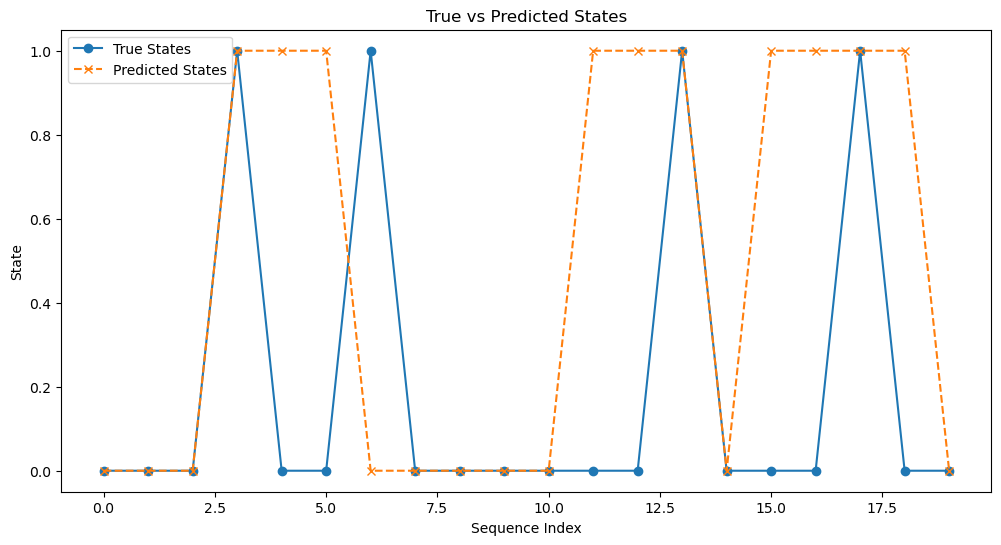

In [36]:
import matplotlib.pyplot as plt

# Visualize the first few test sequences
plt.figure(figsize=(12, 6))
plt.plot(y_test[:20], label="True States", marker="o")
plt.plot(predicted_labels[:20], label="Predicted States", linestyle="--", marker="x")
plt.legend()
plt.title("True vs Predicted States")
plt.xlabel("Sequence Index")
plt.ylabel("State")
plt.show()


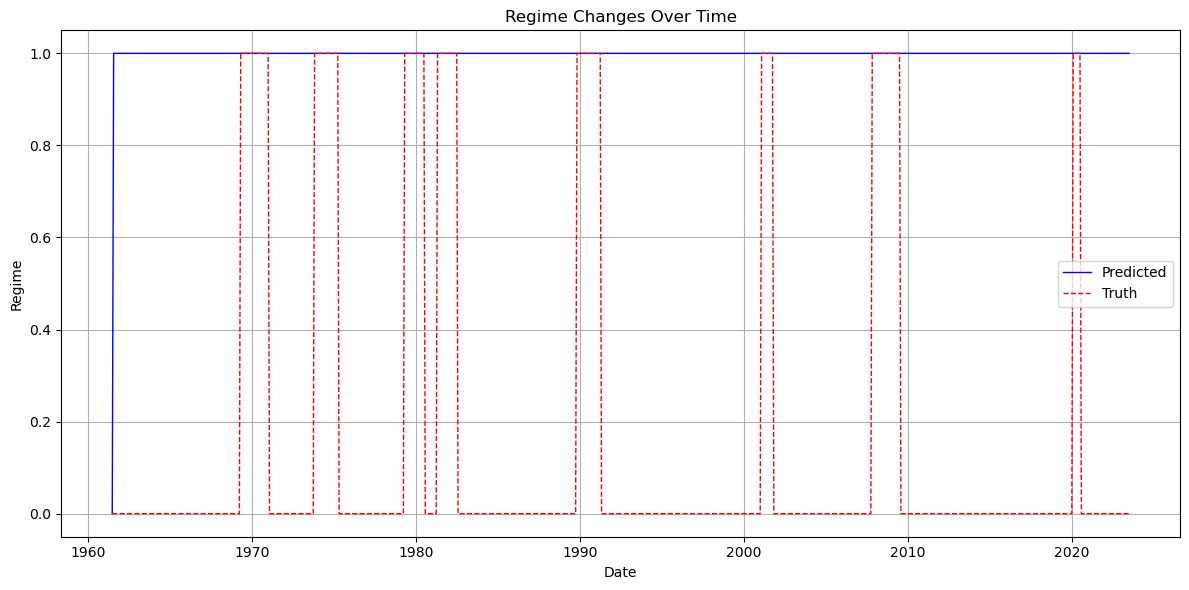

In [39]:
import matplotlib.pyplot as plt

# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])
truth = data['Recession']

# Plot the Regime column over time
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['Regime'], label='Predicted', color='blue', lw=1)
plt.plot(data['DATE'], truth, label='Truth', color='red', linestyle='dashed', lw=1)

# Add titles and labels
plt.title('Regime Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Regime')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


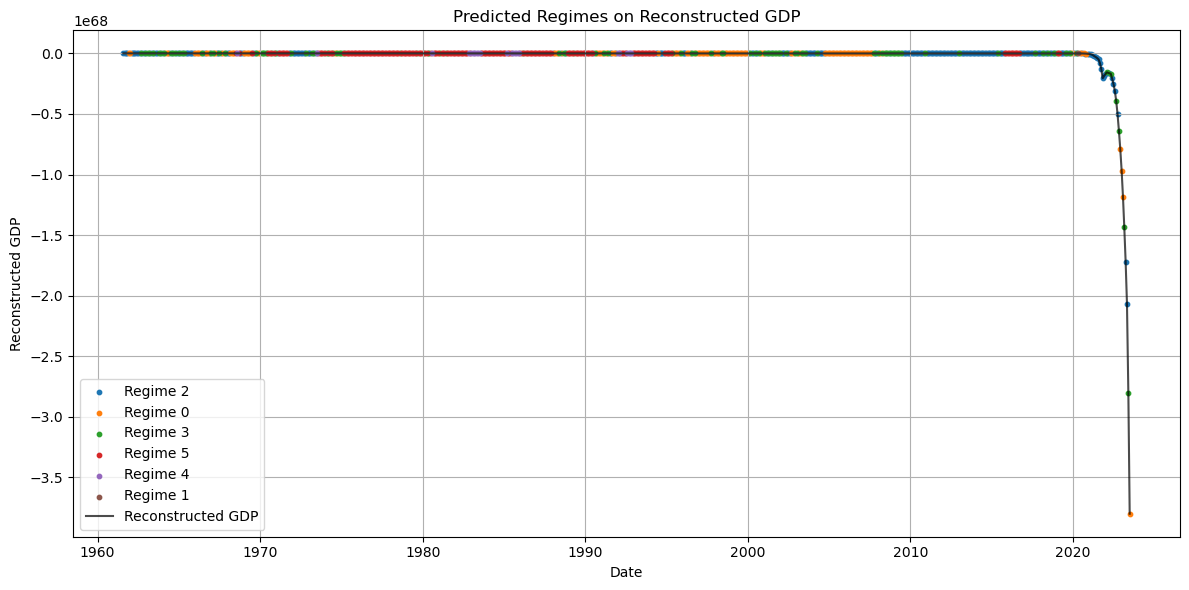

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with predicted regimes

data = pd.read_csv('hmm_regimes.csv')

# Ensure 'Date' is treated as a datetime object
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'])

# Reconstruct GDP values from percent change using 2000 as the starting value
initial_gdp = 2000
gdp_values = [initial_gdp]

# Iterate to reconstruct GDP from percent change
for pct_change in data['gdp_percent_change']:
    gdp_values.append(gdp_values[-1] * (1 + pct_change))

# Add reconstructed GDP to the dataset
data['Reconstructed_GDP'] = gdp_values[1:]  # Skip the initial value

# Plot reconstructed GDP with predicted states
plt.figure(figsize=(12, 6))
for regime in data['Regime'].unique():
    regime_data = data[data['Regime'] == regime]
    plt.scatter(regime_data['DATE'], regime_data['Reconstructed_GDP'], label=f'Regime {regime}', s=10)

plt.plot(data['DATE'], data['Reconstructed_GDP'], label="Reconstructed GDP", color="black", alpha=0.7)
plt.title('Predicted Regimes on Reconstructed GDP')
plt.xlabel('Date')
plt.ylabel('Reconstructed GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()